In [31]:
# wew are importing neccessary libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400

In [2]:
# reading the file 
df = pd.read_csv("df_clean_3.csv")

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,0,798fc410-45c1,20000,2,2,1,24,2,2,...,0,0,0,0,689,0,0,0,0,1
1,1,1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,2,85698822-43f5,90000,2,2,2,34,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,3,0737c11b-be42,50000,2,2,1,37,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Getting the info of the csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0.1                26664 non-null  int64 
 1   Unnamed: 0                  26664 non-null  int64 
 2   ID                          26664 non-null  object
 3   LIMIT_BAL                   26664 non-null  int64 
 4   SEX                         26664 non-null  int64 
 5   EDUCATION                   26664 non-null  int64 
 6   MARRIAGE                    26664 non-null  int64 
 7   AGE                         26664 non-null  int64 
 8   PAY_1                       26664 non-null  int64 
 9   PAY_2                       26664 non-null  int64 
 10  PAY_3                       26664 non-null  int64 
 11  PAY_4                       26664 non-null  int64 
 12  PAY_5                       26664 non-null  int64 
 13  PAY_6                       26664 non-null  in

Text(0.5, 0, 'Education level : ordinary encoding')

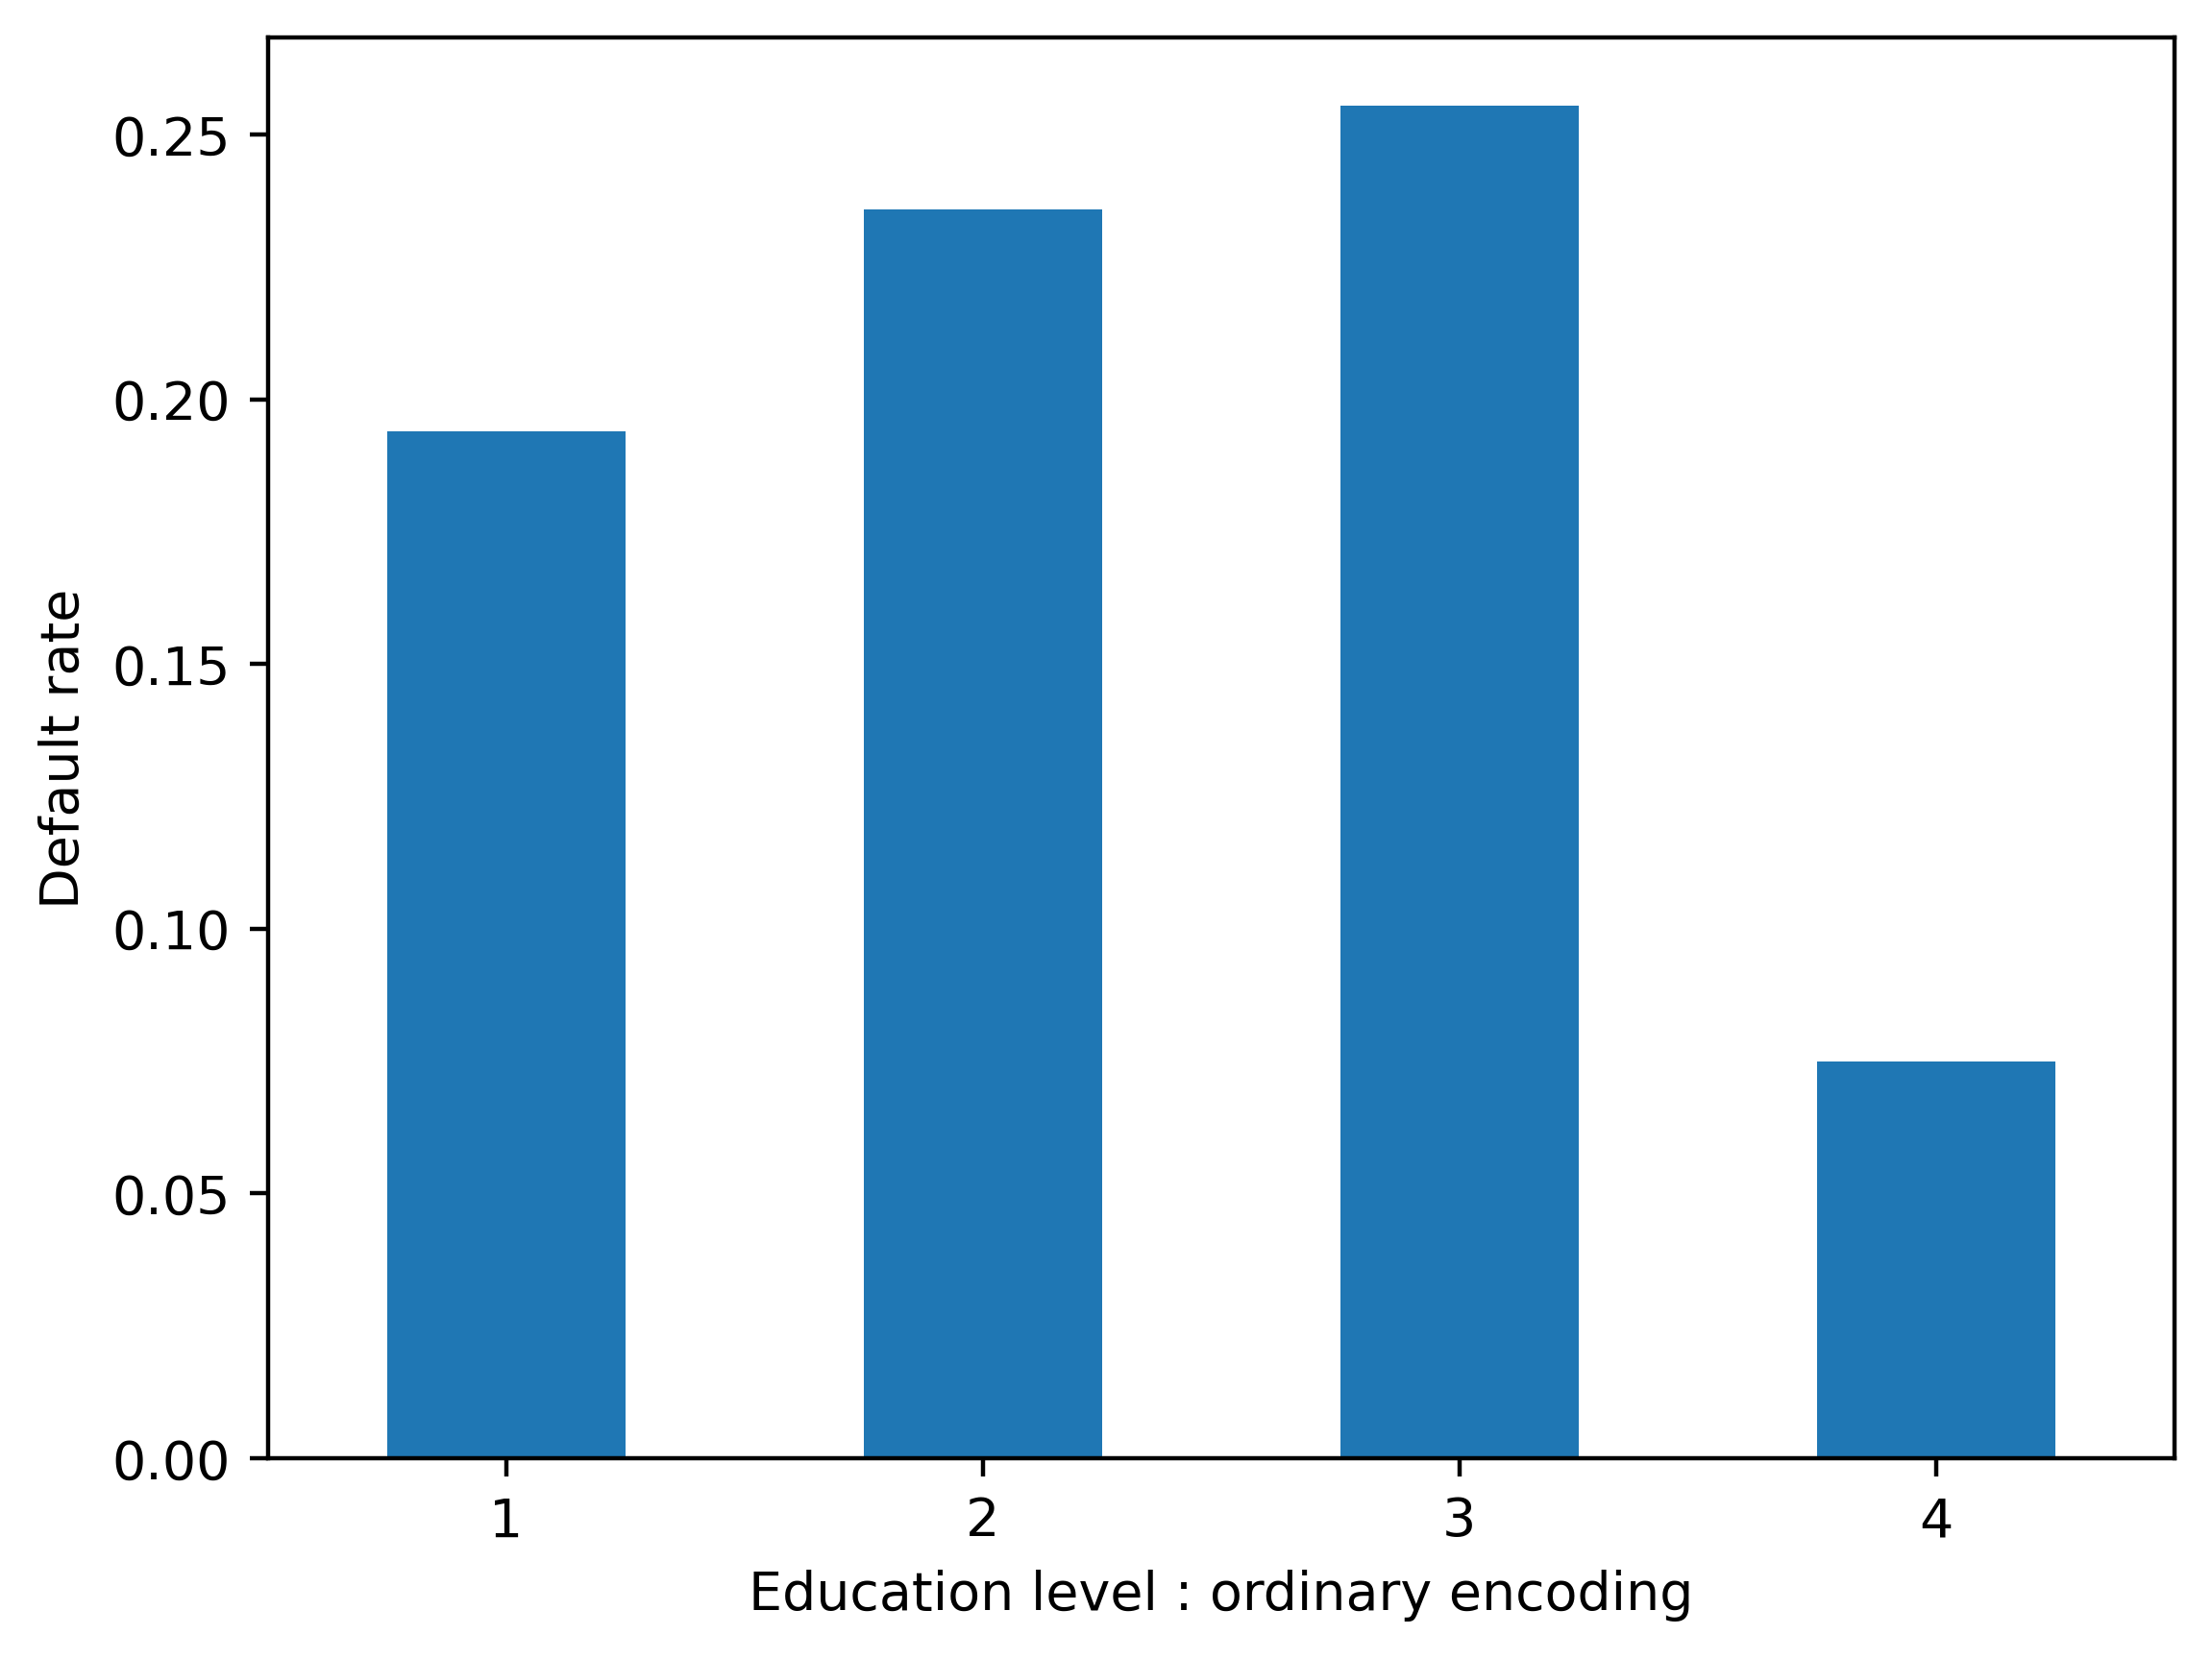

In [50]:
#  Plotting a bar chat to represent the relationship bwtween the edcuation and payment next month 
df.groupby("EDUCATION").agg({"default payment next month":"mean"}).plot.bar(legend = False, rot=0)
plt.ylabel("Default rate")
plt.xlabel("Education level : ordinary encoding")

In [32]:
# ceratig an new columns with none as value
df["EDUCATION_CAT"]= "None"

In [33]:
df[["EDUCATION","EDUCATION_CAT"]].head(10)

,EDUCATION,EDUCATION_CAT
0,2,None
1,2,None
2,2,None
3,2,None
4,2,None
5,1,None
6,1,None
7,2,None
8,3,None
9,3,None


In [35]:
# cerating an cat mapping var to map the ducation columns
cat_map = { 1 : "graduate", 2  : "univesity", 3 : "high school", 4 : "others"}

In [37]:
# Mapping the values to the cat 
df["EDUCATION_CAT"] = df["EDUCATION"].map(cat_map)
df["EDUCATION_CAT"].head()

0    univesity
1    univesity
2    univesity
3    univesity
4    univesity
Name: EDUCATION_CAT, dtype: object

In [39]:
# we are getting the dummy values in each categories
edu_ohe = pd.get_dummies(df["EDUCATION_CAT"])
edu_ohe.head(10)

,graduate,high school,others,univesity
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
5,True,False,False,False
6,True,False,False,False
7,False,False,False,True
8,False,True,False,False
9,False,True,False,False


In [41]:
df_cont = pd.concat( [df, edu_ohe], axis = 1)

In [43]:
df_cont[["EDUCATION_CAT","graduate","high school","others","univesity"]].head(10)

,EDUCATION_CAT,graduate,high school,others,univesity
0,univesity,False,False,False,True
1,univesity,False,False,False,True
2,univesity,False,False,False,True
3,univesity,False,False,False,True
4,univesity,False,False,False,True
5,graduate,True,False,False,False
6,graduate,True,False,False,False
7,univesity,False,False,False,True
8,high school,False,True,False,False
9,high school,False,True,False,False


In [52]:
new_one=df.groupby("EDUCATION").agg({"default payment next month":"mean"})
print(new_one)

           default payment next month
EDUCATION                            
1                            0.193901
2                            0.235913
3                            0.255479
4                            0.074879


In [62]:
df_cont.to_csv("df_credit.csv")

In [71]:
new_df = pd.read_csv("df_credit.csv", index_col =  0)
new_df.head()

,Unnamed: 0.1,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate,high school,others,univesity
0,0,0,798fc410-45c1,20000,2,2,1,24,2,2,...,0,0,0,0,1,univesity,False,False,False,True
1,1,1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,...,1000,1000,0,2000,1,univesity,False,False,False,True
2,2,2,85698822-43f5,90000,2,2,2,34,0,0,...,1000,1000,1000,5000,0,univesity,False,False,False,True
3,3,3,0737c11b-be42,50000,2,2,1,37,0,0,...,1200,1100,1069,1000,0,univesity,False,False,False,True
4,4,4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,...,10000,9000,689,679,0,univesity,False,False,False,True


In [72]:
%matplotlib inline 

In [74]:
pay_feature  = [ "PAY_1" , "PAY_2", "PAY_3","PAY_4","PAY_5", "PAY_6"]

new_df[pay_feature].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
